# Data Mining Final Project
# 

In [199]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np

import csv
import datetime
import sys

In [200]:
movie_data = pd.read_csv('Training Dataset.csv')
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,4834,Wes Studi,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,...,48350,Jack Davenport,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,...,11700,Stephanie Sigman,994.0,English,UK,245000000.0,2015.0,393.0,6.8,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000,448130642.0,Action|Thriller,...,106759,Joseph Gordon-Levitt,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131,NaN,Documentary,...,143,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0


In [201]:
movie_data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
count,4019.000000,4026.000000,3949.00000,4025.000000,4033.000000,3.580000e+03,4.033000e+03,4033.000000,4024.000000,3.725000e+03,3945.000000,4029.000000,4033.000000,4033.000000
mean,154.432446,109.789369,773.42036,743.108820,7347.995041,5.453579e+07,9.748044e+04,10979.856930,308.881710,4.739603e+07,2003.120152,1923.736163,6.440689,8700.610464
std,123.572990,25.910162,3002.22934,1826.696825,14508.290333,7.095310e+07,1.483416e+05,18088.285526,399.021038,2.264015e+08,10.392635,4386.154450,1.089512,20993.662489
min,1.000000,7.000000,0.00000,0.000000,0.000000,1.620000e+02,6.000000e+00,0.000000,1.000000,1.300000e+04,1927.000000,0.000000,1.600000,0.000000
25%,64.000000,95.000000,10.00000,186.000000,738.000000,1.040898e+07,1.506000e+04,1863.000000,90.000000,1.200000e+07,1999.000000,376.000000,5.800000,0.000000
50%,125.000000,106.000000,58.00000,432.000000,1000.000000,3.193367e+07,4.589500e+04,3871.000000,186.000000,2.500000e+07,2005.000000,674.000000,6.500000,211.000000
75%,211.000000,120.000000,221.00000,687.000000,12000.000000,7.002918e+07,1.139630e+05,15710.000000,370.000000,5.000000e+07,2010.000000,968.000000,7.200000,10000.000000
max,813.000000,511.000000,23000.00000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,349000.000000


# Dimension Reduction
- Some of the variables can be removed to reduce multicollinearity. Because some variables are not applicable for prediction, such as "num_voted_users" and "movie_facebook_likes", because these numbers will be unavailable before a movie is released.

In [202]:
#Remove unapplicable variables
#  "gross", "cast_total_facebook_likes", "num_critic_for_reviews", 
#   "num_voted_users", "movie_facebook_likes"
#   and "num_user_for_reviews"
new_movie_data = movie_data.drop(['gross', 'num_voted_users',
                                  'num_critic_for_reviews',
                                  'cast_total_facebook_likes',
                                  'movie_facebook_likes', 
                                  'num_user_for_reviews'], axis=1)
new_movie_data


,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,actor_3_name,language,country,budget,title_year,actor_2_facebook_likes,imdb_score
0,Color,James Cameron,178.0,0.0,855.0,Joel David Moore,1000,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,English,USA,237000000.0,2009.0,936.0,7.9
1,Color,Gore Verbinski,169.0,563.0,1000.0,Orlando Bloom,40000,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,English,USA,300000000.0,2007.0,5000.0,7.1
2,Color,Sam Mendes,148.0,0.0,161.0,Rory Kinnear,11000,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,English,UK,245000000.0,2015.0,393.0,6.8
3,Color,Christopher Nolan,164.0,22000.0,23000.0,Christian Bale,27000,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,English,USA,250000000.0,2012.0,23000.0,8.5
4,NaN,Doug Walker,NaN,131.0,NaN,Rob Walker,131,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,12.0,7.1
5,Color,Andrew Stanton,132.0,475.0,530.0,Samantha Morton,640,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,English,USA,263700000.0,2012.0,632.0,6.6
6,Color,Sam Raimi,156.0,0.0,4000.0,James Franco,24000,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,Kirsten Dunst,English,USA,258000000.0,2007.0,11000.0,6.2
7,Color,Nathan Greno,100.0,15.0,284.0,Donna Murphy,799,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,M.C. Gainey,English,USA,260000000.0,2010.0,553.0,7.8
8,Color,Joss Whedon,141.0,0.0,19000.0,Robert Downey Jr.,26000,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,Scarlett Johansson,English,USA,250000000.0,2015.0,21000.0,7.5
9,Color,David Yates,153.0,282.0,10000.0,Daniel Radcliffe,25000,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,Rupert Grint,English,UK,250000000.0,2009.0,11000.0,7.5


In [203]:

movie_data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
count,4019.000000,4026.000000,3949.00000,4025.000000,4033.000000,3.580000e+03,4.033000e+03,4033.000000,4024.000000,3.725000e+03,3945.000000,4029.000000,4033.000000,4033.000000
mean,154.432446,109.789369,773.42036,743.108820,7347.995041,5.453579e+07,9.748044e+04,10979.856930,308.881710,4.739603e+07,2003.120152,1923.736163,6.440689,8700.610464
std,123.572990,25.910162,3002.22934,1826.696825,14508.290333,7.095310e+07,1.483416e+05,18088.285526,399.021038,2.264015e+08,10.392635,4386.154450,1.089512,20993.662489
min,1.000000,7.000000,0.00000,0.000000,0.000000,1.620000e+02,6.000000e+00,0.000000,1.000000,1.300000e+04,1927.000000,0.000000,1.600000,0.000000
25%,64.000000,95.000000,10.00000,186.000000,738.000000,1.040898e+07,1.506000e+04,1863.000000,90.000000,1.200000e+07,1999.000000,376.000000,5.800000,0.000000
50%,125.000000,106.000000,58.00000,432.000000,1000.000000,3.193367e+07,4.589500e+04,3871.000000,186.000000,2.500000e+07,2005.000000,674.000000,6.500000,211.000000
75%,211.000000,120.000000,221.00000,687.000000,12000.000000,7.002918e+07,1.139630e+05,15710.000000,370.000000,5.000000e+07,2010.000000,968.000000,7.200000,10000.000000
max,813.000000,511.000000,23000.00000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,349000.000000


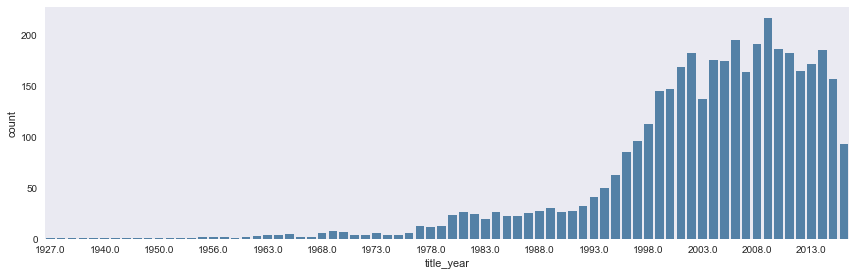

In [204]:
# Data Visualization by Release time
with sns.axes_style('dark'):
    g = sns.factorplot("title_year", data=movie_data, aspect=3, ci='none',
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)
    

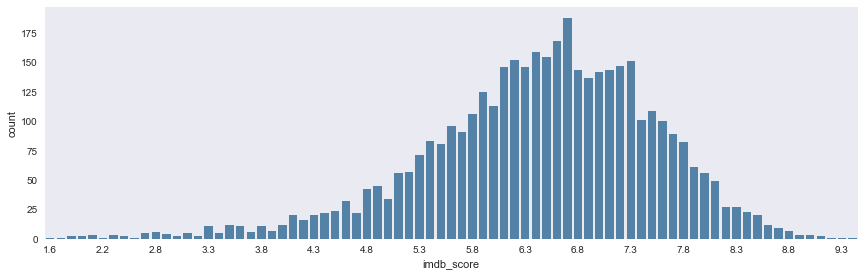

In [205]:
# Data Visualization by IMDB score
with sns.axes_style('dark'):
    g = sns.factorplot("imdb_score", data=movie_data, aspect=3, ci='none',
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

Text(0.5,1,u'IMDB score VS movie year')

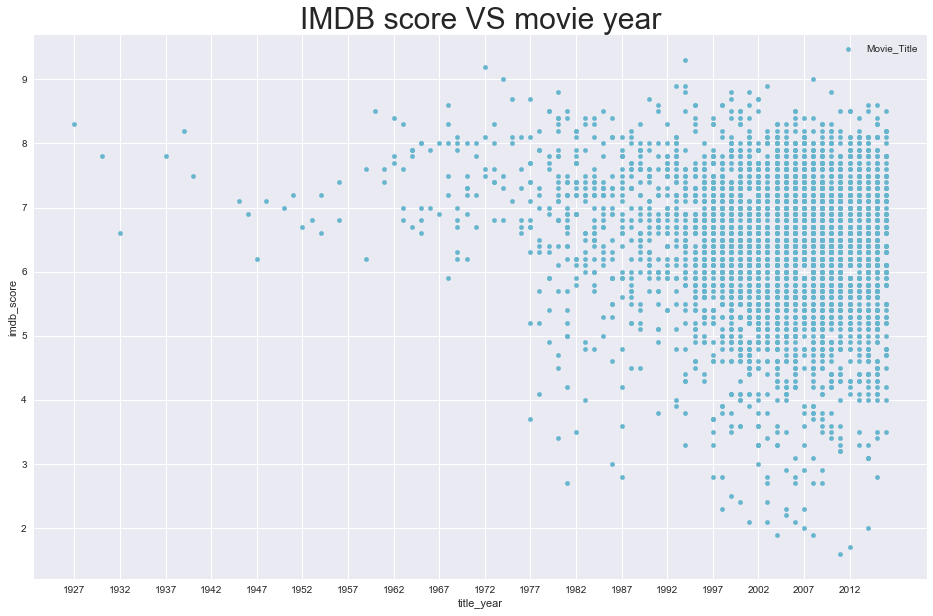

In [138]:
# IMDB score VS movie year

movie_data.plot.scatter(x='title_year', y='imdb_score', xticks = range(1927,2014,5) , color='c', label='Movie_Title', s = 20, figsize = (16,10));
plt.title("IMDB score VS movie year", size = 30)

# Correlation Analysis

Text(0.5,1,u'Correlation Heatmap')

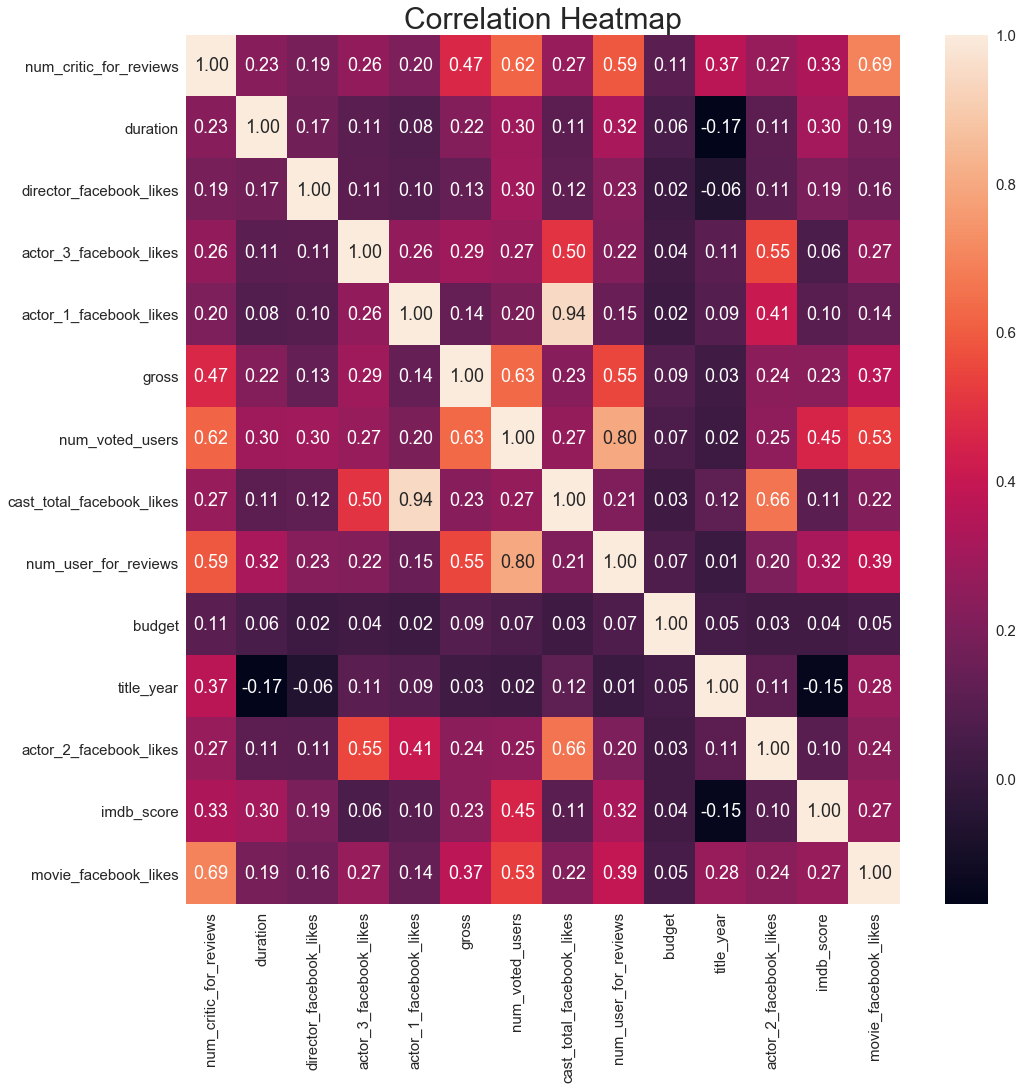

In [159]:
fig = plt.subplots(figsize=(16,16))
sns.set(font_scale=1.5)
corr = movie_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, fmt=".2f")
plt.title('Correlation Heatmap', size = 30)

In [192]:


corr = movie_data.corr()# df is the pandas dataframe
c1.abs().unstack()
c1.sort_values(ascending = False)


movie_facebook_likes       movie_facebook_likes         1.000000
imdb_score                 imdb_score                   1.000000
duration                   duration                     1.000000
director_facebook_likes    director_facebook_likes      1.000000
actor_3_facebook_likes     actor_3_facebook_likes       1.000000
actor_1_facebook_likes     actor_1_facebook_likes       1.000000
gross                      gross                        1.000000
num_voted_users            num_voted_users              1.000000
cast_total_facebook_likes  cast_total_facebook_likes    1.000000
num_user_for_reviews       num_user_for_reviews         1.000000
budget                     budget                       1.000000
title_year                 title_year                   1.000000
actor_2_facebook_likes     actor_2_facebook_likes       1.000000
num_critic_for_reviews     num_critic_for_reviews       1.000000
actor_1_facebook_likes     cast_total_facebook_likes    0.943172
cast_total_facebook_likes

In [55]:


###############################################################################
# Extracts the required data from the given dataset and converts it into
# the required format
###############################################################################

# print the current timestamp
print("Start time: " + str(datetime.datetime.now()).split('.')[0])

# setup progress bar
toolbar_width = 60
sys.stdout.write("[%s" % (" " * (toolbar_width/3)))
sys.stdout.write("***Processing data***")
sys.stdout.write("%s]" % (" " * (toolbar_width/3)))
sys.stdout.flush()
sys.stdout.write("\n")

# initialize variables
column = []
data = []
label = []
progress = 0

with open('Training Dataset.csv') as f:
    reader = csv.DictReader(f) # read rows into a dictionary format
    for row in reader: # read a row as {column1: value1, column2: value2,...}
        column.append(row['movie_title'])
        column.append(row['actor_1_name'])
        column.append(row['color'])
        column.append(row['director_name'])
        column.append(row['num_critic_for_reviews'])
        column.append(row['duration'])
        column.append(row['director_facebook_likes'])
        column.append(row['actor_3_facebook_likes'])
        column.append(row['actor_2_name'])
        column.append(row['actor_1_facebook_likes'])
        column.append(row['gross'])
        column.append(row['genres'])
        column.append(row['num_voted_users'])
        column.append(row['cast_total_facebook_likes'])
        column.append(row['actor_3_name'])
        column.append(row['num_user_for_reviews'])
        column.append(row['language'])
        column.append(row['country'])
        column.append(row['budget'])
        column.append(row['title_year'])
        column.append(row['actor_2_facebook_likes'])
        column.append(row['imdb_score'])
        column.append(row['movie_facebook_likes'])
        data.append(column) #all fields
        label.append(row['imdb_score']) #scores
        column = []
        progress += 1;
        if progress % 65 == 0:  #print progress
            sys.stdout.write("#")
            sys.stdout.flush()
sys.stdout.write("\n")

Start time: 2018-05-05 21:19:33
[                    ***Processing data***                    ]
##############################################################


In [56]:
def encode(data):
    i = 0;
    word = 0
    test = []
    new_array = []

    while i < len(data):
        number_string = 0
        word = 0
        ch=0
        for arr in data[i]:
            for s in arr:
                ch = ["".join("%d" % ord(c) for c in s)]
                word += int(ch[0])
            test.append(word)
        new_array.append(test)
        test = []
        i += 1;
    return new_array

In [57]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

###############################################################################
# Runs the various classification algorithms on the test data
###############################################################################


# setup progress bar
toolbar_width = 60
sys.stdout.write("\n[%s" % (" " * (toolbar_width/3)))
sys.stdout.write("***Predicting data***")
sys.stdout.write("%s]" % (" " * (toolbar_width/3)))
sys.stdout.flush()
sys.stdout.write("\n")

# initialize variables
column = []
data_val = []
progress = 0
scores = []

#variables for calculating error margin
rf_error_margin = 0
dt_error_margin = 0
nb_error_margin = 0
svm_error_margin = 0
count = 0

# send the extracted data available from extract_data to the encode function
# this function vectorizes the text based data into ASCII format for use by
# the algorithms
encoded_data = encode(data)

# convert the float scores to int. Multiplying by 10 helps us keep the decimal
# level precision which would otherwise be lost in typecasting
i = 0
while i < len(label):
    scores.append(int (float(label[i]) * 10))
    i += 1;

# SVM classifier
#svm_clf = svm.SVC(kernel = 'linear')
#svm_clf.fit(encoded_data, scores)

# Gaussian Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(encoded_data, scores)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(encoded_data, scores)

# Decision Tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(encoded_data, scores)



with open('Testing dataset.csv') as f:
    reader = csv.DictReader(f) # read rows into a dictionary format
    for row in reader: # read a row as {column1: value1, column2: value2,...}
        column.append(row['movie_title'])
        column.append(row['actor_1_name'])
        column.append(row['color'])
        column.append(row['director_name'])
        column.append(row['num_critic_for_reviews'])
        column.append(row['duration'])
        column.append(row['director_facebook_likes'])
        column.append(row['actor_3_facebook_likes'])
        column.append(row['actor_2_name'])
        column.append(row['actor_1_facebook_likes'])
        column.append(row['gross'])
        column.append(row['genres'])
        column.append(row['num_voted_users'])
        column.append(row['cast_total_facebook_likes'])
        column.append(row['actor_3_name'])
        column.append(row['num_user_for_reviews'])
        column.append(row['language'])
        column.append(row['country'])
        column.append(row['budget'])
        column.append(row['title_year'])
        column.append(row['actor_2_facebook_likes'])
        column.append(row['imdb_score'])
        column.append(row['movie_facebook_likes'])
        data_val.append(column)
        test_data = encode(data_val)

        # calculate error margin for SVM
        #svm_error_margin += abs((svm_clf.predict (test_data)/10.0) - (float(row['imdb_score'])))

        # calculate error margin for Naive Bayes
        nb_error_margin += abs((nb_clf.predict (test_data)/10.0) - (float(row['imdb_score'])))
        
        # calculate error margin for Random Forest
        rf_error_margin += abs((rf_clf.predict (test_data)/10.0) - (float(row['imdb_score'])))
        
        # calculate error margin for Decision Tree
        dt_error_margin += abs((dt_clf.predict (test_data)/10.0) - (float(row['imdb_score'])))

        count += 1
        column = []
        data_val = []

# Print the error margin

print("Error margin for Naive Bayes: %0.2f" % (nb_error_margin/count))

print("Error margin for Random Forest: %0.2f" % (rf_error_margin/count))

print("Error margin for Decision Tree: %0.2f" % (dt_error_margin/count))

#print("Error margin for SVM: %0.2f" % (svm_error_margin/count))

#print current timestamp
print("End time: " + str(datetime.datetime.now()).split('.')[0])



[                    ***Predicting data***                    ]
Error margin for Naive Bayes: 3.30
Error margin for Random Forest: 1.12
Error margin for Decision Tree: 1.27
End time: 2018-05-05 21:19:53
